<a href="https://colab.research.google.com/github/sushant5320/Traffic-sign-detection-project/blob/main/Traffic_sign_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 96% 585M/612M [00:03<00:00, 198MB/s]
100% 612M/612M [00:03<00:00, 179MB/s]


In [4]:
import zipfile

In [5]:
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()



In [6]:
unzip_data('gtsrb-german-traffic-sign.zip')

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [104]:
cur_path=os.getcwd()
path = os.path.join(cur_path,'Train')

In [173]:
path = os.path.join(cur_path,'Train',str(1))
path

'/content/Train/1'

In [107]:
data = []
labels = []
classes = 43
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
         try:
             image = Image.open(path + '/'+ a)
             image = image.resize((30,30))
             image = np.array(image)
             data.append(image)
             labels.append(i)
         except Exception as e:
             print(e)


In [ ]:
data = np.array(data)
labels = np.array(labels)

data, labels

In [109]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [110]:

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [111]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [112]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [113]:
#Compilation of the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(X_train, y_train,
                    epochs = epochs,
                    validation_data = (X_test, y_test),
                    batch_size = 32)


In [ ]:
model.evaluate(X_test, y_test)

In [116]:
#defining a function for plotting loss and accuracy for our model
def plot_loss_acc(Model_history=True):
  loss = Model_history.history["loss"]
  val_loss = Model_history.history['val_loss']

  accuracy = Model_history.history['accuracy']
  val_accuracy = Model_history.history['val_accuracy']

  epochs = range(len(Model_history.history['loss']))

  #plotting graphs for accuracy
  plt.figure(0)
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='val accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend();

  #plotting graphs for loss
  plt.figure(1)
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend();


In [ ]:
plot_loss_acc(history)

In [118]:

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [204]:
#defining a function that predicts and plots an image
def pred_and_plot(img_dir= True):
  import matplotlib.image as mpimg
  import os
  import random
  import matplotlib.pyplot as plt

  img_path = img_dir
  img_dir  = random.choice(os.listdir(img_path))
  img_path = img_path + '/' + img_dir


  #reading image file
  img = mpimg.imread(img_path)
  plt.imshow(img)

  #prediction of image
  image = Image.open(img_path)
  image = image.resize((30,30))
  pred = model.predict(tf.expand_dims(np.array(image), axis = 0))
  predicted_class = classes.get(pred.argmax())


  return predicted_class, img_path

1/1 [==============================] - 0s 159ms/step


('Veh > 3.5 tons prohibited', '/content/Test/12268.png')

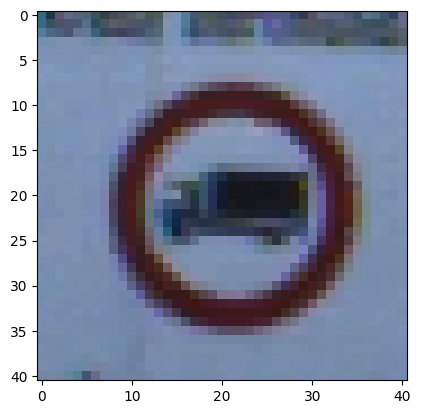

In [206]:
pred_and_plot('/content/Test')

In [188]:
#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

1/1 [==============================] - 0s 20ms/step


'Priority road'

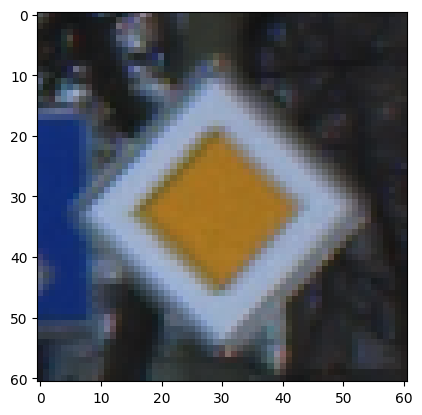

In [195]:
#Choosing random image from test set
img_path = '/content/Test'
img_dir  = random.choice(os.listdir(img_path))
img_path = img_path + '/' + img_dir
img_path

#reading image file
img = mpimg.imread(img_path)
plt.imshow(img)

#prediction of image
image = Image.open(img_path)
image = image.resize((30,30))
pred = model.predict(tf.expand_dims(np.array(image), axis = 0))

classes.get(pred.argmax())

In [129]:
model.save("Traffic_sign.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
